In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1824)

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
image,label = training_data[0]

In [4]:
image.shape

torch.Size([1, 28, 28])

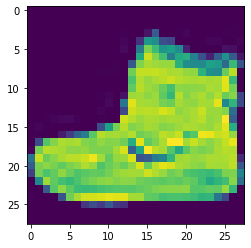

In [5]:
plt.imshow(image.squeeze(0))

In [8]:
batch_size =128

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([128, 1, 28, 28])
Shape of y: torch.Size([128]) torch.int64


In [9]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [11]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [12]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [13]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.310713  [    0/60000]
loss: 0.450019  [12800/60000]
loss: 0.389321  [25600/60000]
loss: 0.408130  [38400/60000]
loss: 0.458654  [51200/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.414002 

Epoch 2
-------------------------------
loss: 0.258207  [    0/60000]
loss: 0.306332  [12800/60000]
loss: 0.298889  [25600/60000]
loss: 0.339467  [38400/60000]
loss: 0.346622  [51200/60000]
Test Error: 
 Accuracy: 86.3%, Avg loss: 0.377044 

Epoch 3
-------------------------------
loss: 0.200505  [    0/60000]
loss: 0.250273  [12800/60000]
loss: 0.315484  [25600/60000]
loss: 0.312448  [38400/60000]
loss: 0.326798  [51200/60000]
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.363440 

Epoch 4
-------------------------------
loss: 0.176930  [    0/60000]
loss: 0.234545  [12800/60000]
loss: 0.310851  [25600/60000]
loss: 0.300711  [38400/60000]
loss: 0.279823  [51200/60000]
Test Error: 
 Accuracy: 87.3%, Avg loss: 0.342949 

Epoch 5
------------------------

In [ ]:
#Convolution neural networks

In [14]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=64, kernel_size = (5,5), stride=1, padding=1)

In [15]:
conv_layer(image.unsqueeze(0)).shape

torch.Size([1, 64, 26, 26])

In [16]:
#Build a sequential model containing convolution layer, activation and pooling
conv_model = nn.Sequential(nn.Conv2d(1,32,7),nn.ReLU(),nn.MaxPool2d(2),nn.Conv2d(32,64,5),nn.ReLU(),nn.MaxPool2d(2),nn.Conv2d(64,10,3),nn.ReLU())

In [17]:
conv_model(image.unsqueeze(0)).shape

torch.Size([1, 10, 1, 1])

In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
# Define model
class ConvNetwork(nn.Module):
    def __init__(self):
        super(ConvNetwork, self).__init__()
        self.conv_stack =nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3),nn.ReLU(),nn.AvgPool2d(kernel_size=2),
                                        nn.Conv2d(in_channels=5, out_channels=5, kernel_size=3),nn.ReLU(),
                                       nn.Conv2d(in_channels=5, out_channels=6, kernel_size=3),nn.ReLU(),
                                       nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3),nn.ReLU(),
                                               nn.Flatten())
        self.linear_stack = nn.Sequential(nn.Linear(in_features=245, out_features=200),nn.ReLU(),
                                          nn.Linear(in_features=200, out_features=100),nn.ReLU(),
                                          nn.Linear(in_features=100, out_features=10),nn.ReLU())

    def forward(self, x):
        x = self.conv_stack(x)
        logits = self.linear_stack(x)
        return logits

model = ConvNetwork().to(device)
print(model)

ConvNetwork(
  (conv_stack): Sequential(
    (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(5, 6, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (linear_stack): Sequential(
    (0): Linear(in_features=245, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [19]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


RuntimeError: ignored

In [ ]:
conv_stack =nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3),nn.ReLU(),nn.AvgPool2d(kernel_size=2),
                                        nn.Conv2d(in_channels=5, out_channels=5, kernel_size=3),nn.ReLU(),
                                       nn.Conv2d(in_channels=5, out_channels=6, kernel_size=3),nn.ReLU(),
                                       nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3),nn.ReLU(),
                                               nn.Flatten())

In [ ]:
conv_stack(image.unsqueeze(0)).shape

torch.Size([1, 294])

In [ ]:
#pytorch lightning, deep learning models aka black box models as many layers implies many weights and biases, captum